# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 75.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 122.5 MB/s eta 0:00:00
  DEPRECATION: Building 'bokeh' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'bokeh'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080108 sha256=7c1e6e0e2038e1f0fb47f8dd42fdc2485565a7da59306adfc411ce8a07524627
  Stored in directory: /root/.cache/pip/wheels/0e/c4/ce/fecee9e6406e166eaba4e09b1acd2096a84ffef5275ea90806
Successful

In [6]:
! pip uninstall numpy -y

In [7]:
! pip uninstall numpy -y

In [8]:
! pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-tabular 1.3.0 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.3.0 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-timeseries 1.3.0 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.3.0 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.3.0 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-core 1.3.0 requires numpy<2.3.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible

### Setup Kaggle API Key

In [1]:
!mkdir -p /root/.kaggle

In [2]:
!mv /content/kaggle.json /root/.kaggle/

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 324MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later

train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [8]:
# Check structure and nulls
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
# View basic statistics for numerical columns
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [10]:
# Count of unique values per column (useful for categorical detection)
train.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [11]:
# Distribution of selected features (optional deep dive)
print("Season Value Counts:")
print(train["season"].value_counts())

Season Value Counts:
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64


In [12]:
print("\nWeather Value Counts:")
print(train["weather"].value_counts())


Weather Value Counts:
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [15]:
from autogluon.tabular import TabularPredictor

# Drop columns not used for training
train_cleaned = train.drop(columns=["casual", "registered"])

# Train AutoGluon predictor
predictor = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train_cleaned,
    time_limit=600,
    presets="best_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250521_145525"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.38 GB / 12.67 GB (89.8%)
Disk Space Avail:   66.82 GB / 107.72 GB (62.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=3076) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=3295) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=3354) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=3354) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=3354) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=3354) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=3354) [5000]	valid_set's rmse: 125.681 [repeated 2x across cluster]


(_ray_fit pid=3354) 	Ran out of time, early stopping on iteration 6522. Best iteration is:
(_ray_fit pid=3354) 	[6023]	valid_set's rmse: 125.428


(_ray_fit pid=3458) [4000]	valid_set's rmse: 133.013 [repeated 4x across cluster]
(_ray_fit pid=3458) [7000]	valid_set's rmse: 132.416 [repeated 3x across cluster]


(_ray_fit pid=3458) 	Ran out of time, early stopping on iteration 7249. Best iteration is:
(_ray_fit pid=3458) 	[7221]	valid_set's rmse: 132.382


(_ray_fit pid=3610) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=3610) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=3610) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=3610) [4000]	valid_set's rmse: 135.344
(_ray_fit pid=3610) [5000]	valid_set's rmse: 135.358
(_ray_fit pid=3610) [6000]	valid_set's rmse: 135.139


(_ray_fit pid=3610) 	Ran out of time, early stopping on iteration 6559. Best iteration is:
(_ray_fit pid=3610) 	[6258]	valid_set's rmse: 135.071


(_ray_fit pid=3700) [3000]	valid_set's rmse: 138.261 [repeated 3x across cluster]
(_ray_fit pid=3700) [5000]	valid_set's rmse: 137.961 [repeated 2x across cluster]


(_dystack pid=2874) 	-131.9927	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2874) 	120.15s	 = Training   runtime
(_dystack pid=2874) 	26.54s	 = Validation runtime
(_dystack pid=2874) Fitting model: WeightedEnsemble_L2 ... Training model for up to 141.88s of the 5.78s of remaining time.
(_dystack pid=2874) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=2874) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2874) 	0.02s	 = Training   runtime
(_dystack pid=2874) 	0.0s	 = Validation runtime
(_dystack pid=2874) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=2874) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 5.75s of the 5.73s of remaining time.
(_dystack pid=2874) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
(_ray_fit pid=3857) 	Ran out of time, early stopping on iteration 290. Best iteration is:
(_ray_fit pid

### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
# View model performance leaderboard
predictor.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-56.594881,root_mean_squared_error,46.679229,376.013520,0.001409,0.060912,3,True,10
1,LightGBM_BAG_L2,-57.219588,root_mean_squared_error,39.666959,284.668715,0.678374,51.526006,2,True,9
2,LightGBMXT_BAG_L2,-60.760594,root_mean_squared_error,45.999446,324.426602,7.010862,91.283893,2,True,8
3,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.058354,0.039374,0.058354,0.039374,1,True,2
4,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.059807,0.083220,0.001453,0.043846,2,True,7
5,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.058072,0.046336,0.058072,0.046336,1,True,1
6,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.943443,24.693810,0.943443,24.693810,1,True,5
7,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,2.530720,53.900295,2.530720,53.900295,1,True,4
8,LightGBMXT_BAG_L1,-131.460909,root_mean_squared_error,35.162505,108.425640,35.162505,108.425640,1,True,3
9,CatBoost_BAG_L1,-133.739515,root_mean_squared_error,0.235490,46.037255,0.235490,46.037255,1,True,6


In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -56.594881  root_mean_squared_error      46.679229  376.013520                0.001409           0.060912            3       True         10
1         LightGBM_BAG_L2  -57.219588  root_mean_squared_error      39.666959  284.668715                0.678374          51.526006            2       True          9
2       LightGBMXT_BAG_L2  -60.760594  root_mean_squared_error      45.999446  324.426602                7.010862          91.283893            2       True          8
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.058354    0.039374                0.058354           0.039374            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.059807    0.083220         

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -133.7395152005821,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.76059434478847,
  'LightGBM_BAG_L2': -57.219587897209564,
  'WeightedEnsemble_L3': -56.594881146832954}

### Create predictions from test dataset

In [18]:
predictions = predictor.predict(test)
predictions.head()

,count
0,40.469131
1,48.587723
2,52.237484
3,55.851784
4,57.205757


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [19]:
# Describe the `predictions` series to see if there are any negative values
# Check the summary statistics of the predictions
predictions.describe()

,count
count,6493.000000
mean,102.728264
std,90.418571
min,5.721319
25%,19.128481
50%,65.598305
75%,176.427795
max,370.508148


In [20]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [21]:
# Set them to zero
predictions = predictions.clip(lower=0)
# Set all negative predictions to 0
predictions[predictions < 0] = 0


### Set predictions to submission dataframe, save, and submit

In [22]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [23]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 189k/189k [00:00<00:00, 508kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [24]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-05-21 15:08:16.603000  first raw submission               SubmissionStatus.COMPLETE  1.76767      1.76767       
submission_new_hpo.csv       2025-05-20 22:13:48.540000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.50441      0.50441       
submission_new_hpo.csv       2025-05-20 22:13:19.983000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.50441      0.50441       
submission_new_features.csv  2025-05-20 22:07:14.580000  new features                       SubmissionStatus.COMPLETE  0.63021      0.63021       


#### Initial score of `1.94080`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [25]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
# Extract datetime components
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['weekday'] = train['datetime'].dt.weekday  # Monday=0, Sunday=6

# Show the first few rows with new features
print(train.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  day  month  weekday  
0        81        0.0       3          13     16     0    1      1        5  
1        80        0.0       8          32     40     1    1      1        5  
2        80        0.0       5          27     32     2    1      1        5  
3        75        0.0       3          10     13     3    1      1        5  
4        75        0.0       0           1      1     4    1      1        5  


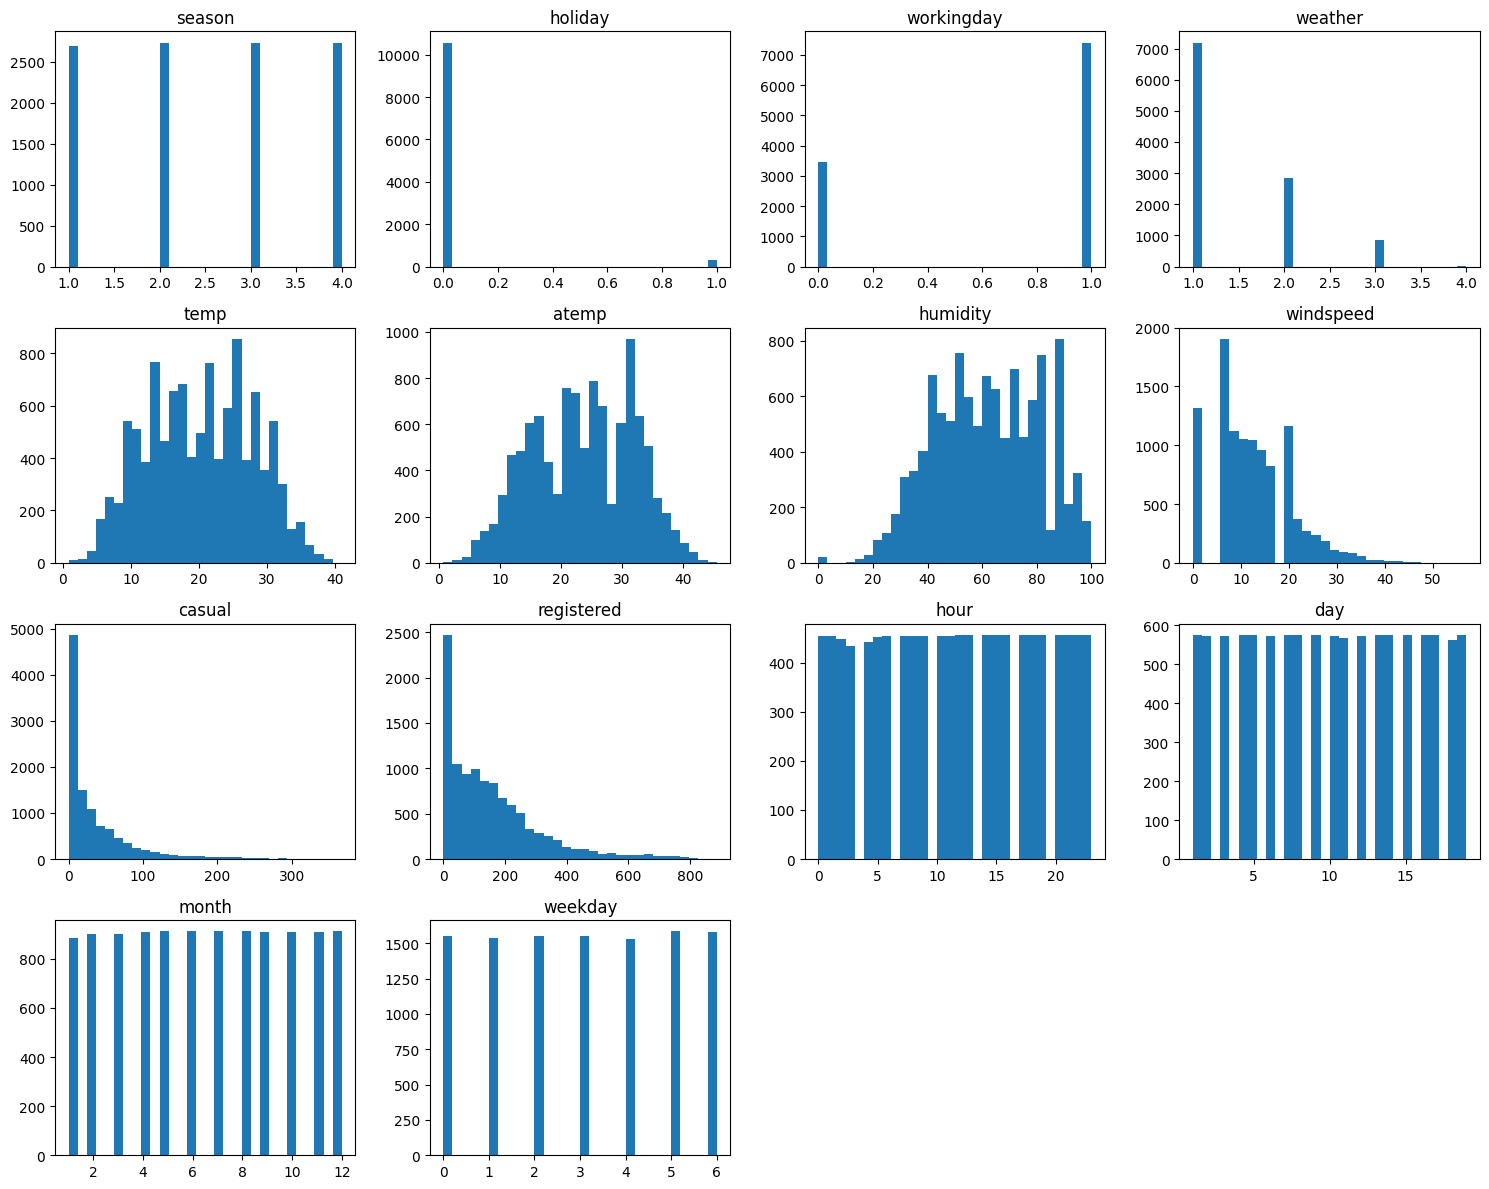

In [26]:
# Prepare data for histograms - exclude 'datetime' and 'count' (target)
import matplotlib.pyplot as plt

features_to_plot = train.drop(columns=['datetime', 'count'])

# Plot histograms for all features
features_to_plot.hist(figsize=(15, 12), bins=30, grid=False)
plt.tight_layout()
plt.show()

In [27]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

train['day'] = train['datetime'].dt.day
test['day'] = test['datetime'].dt.day


train['month'] = train['datetime'].dt.month
test['month'] = test['datetime'].dt.month

train['weekday'] = train['datetime'].dt.weekday  # Monday=0, Sunday=6
test['weekday'] = test['datetime'].dt.weekday  # Monday=0, Sunday=6

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [28]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [29]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,5


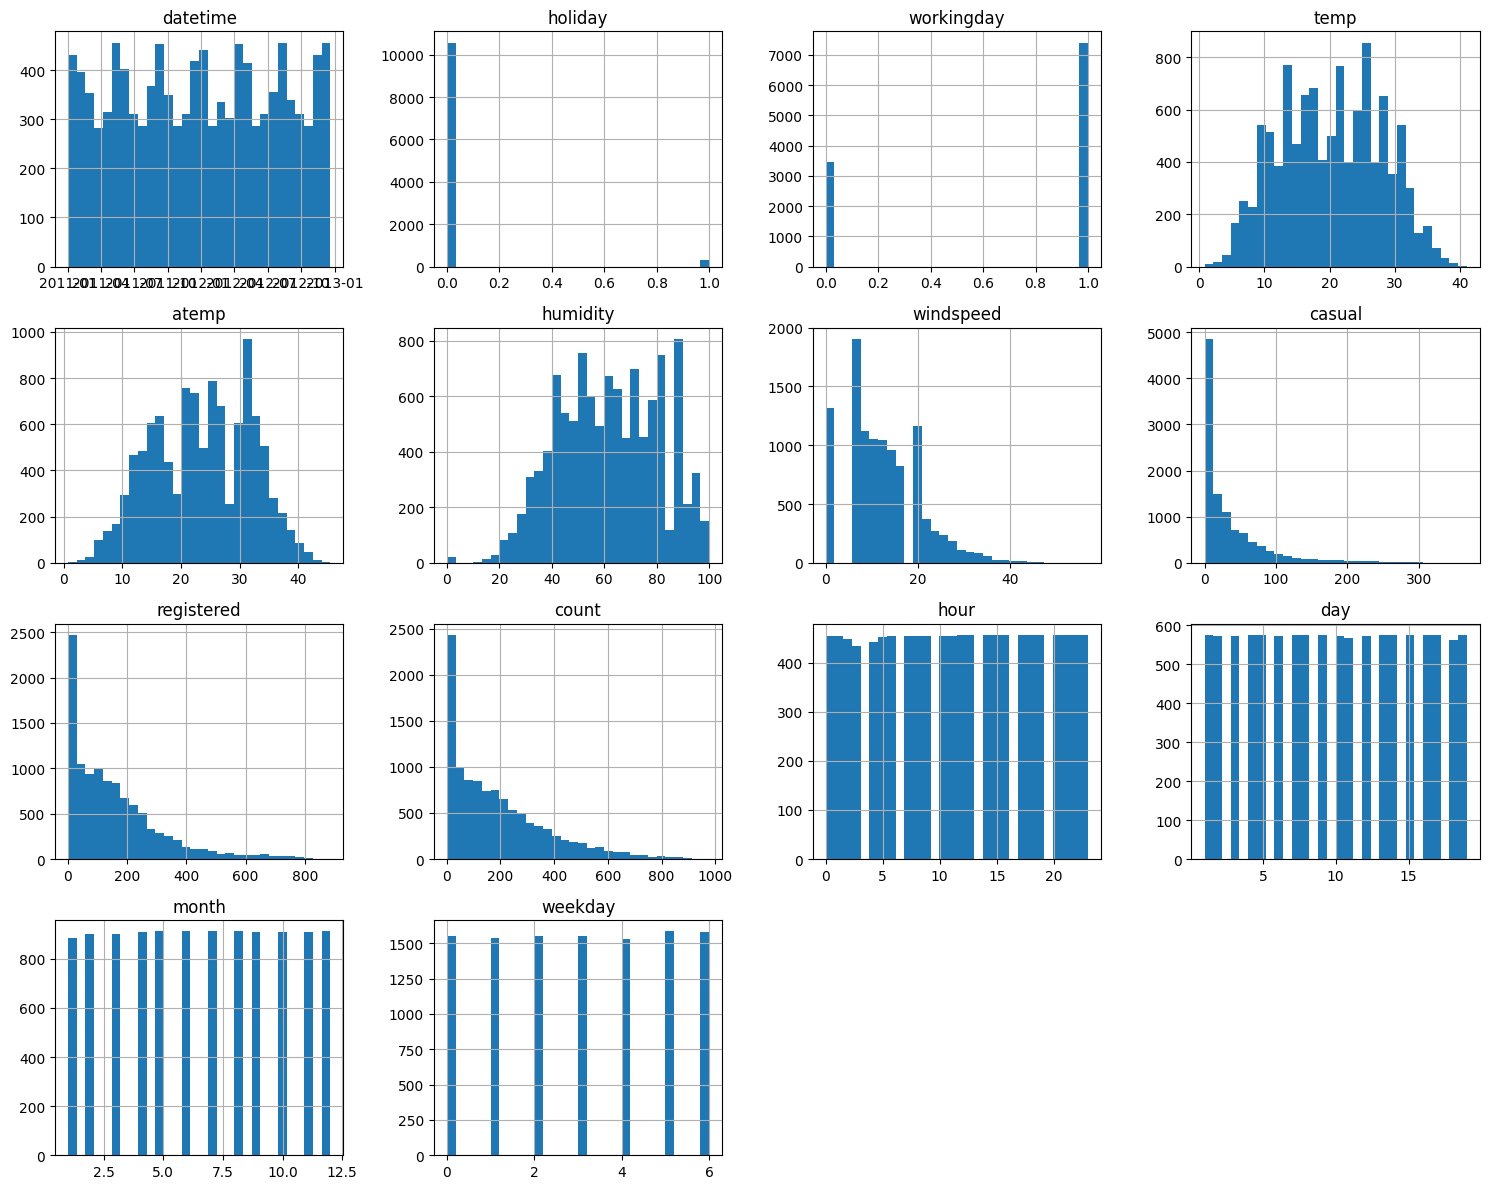

In [30]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [31]:
# Drop columns not used for training (same as before)
train_cleaned_new = train.drop(columns=["casual", "registered"])

# Retrain the predictor with the new features included in train_cleaned_new
predictor_new_features = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train_cleaned_new,
    time_limit=600,
    presets="best_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250521_150825"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.70 GB / 12.67 GB (84.4%)
Disk Space Avail:   66.38 GB / 107.72 GB (61.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [32]:
predictor_new_features.fit_summary()

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3  -30.575341  root_mean_squared_error      74.194789  368.690359                0.001259           0.042551            3       True          8
1        LightGBM_BAG_L2  -30.711331  root_mean_squared_error      71.312221  304.599544                0.492286          52.501959            2       True          7
2      LightGBMXT_BAG_L2  -31.538673  root_mean_squared_error      73.701244  316.145849                2.881309          64.048264            2       True          6
3    WeightedEnsemble_L2  -32.610457  root_mean_squared_error      70.731956  252.083958                0.001158           0.039526            2       True          5
4        LightGBM_BAG_L1  -33.916920  root_mean_squared_error      10.485740   83.786720               

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.39095097806061,
  'LightGBM_BAG_L1': -33.916920183145294,
  'WeightedEnsemble_L2': -32.61045670819144,
  'LightGBMXT_BAG_L2': -31.538672708655444,
  'LightGBM_BAG_L2': -30.711331111807752,
  'WeightedEnsemble_L3': -30.575340774369145},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'LightGBMXT_BAG_L1': ['LightGBMX

In [33]:
# Get predictions from the predictor
predictions_new_features = predictor_new_features.predict(test)

In [34]:
# Remember to set all negative values to zero
# Set them to zero
predictions_new_features = predictions_new_features.clip(lower=0)
# Set all negative predictions to 0
predictions_new_features[predictions_new_features < 0] = 0


In [35]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [36]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 454kB/s]
Successfully submitted to Bike Sharing Demand

In [37]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-21 15:21:45.863000  new features                       SubmissionStatus.COMPLETE  0.65867      0.65867       
submission.csv               2025-05-21 15:08:16.603000  first raw submission               SubmissionStatus.COMPLETE  1.76767      1.76767       
submission_new_hpo.csv       2025-05-20 22:13:48.540000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.50441      0.50441       
submission_new_hpo.csv       2025-05-20 22:13:19.983000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.50441      0.50441       


#### New Score of `0.63021`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [38]:
from autogluon.tabular import TabularPredictor

predictor_new_hpo = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error"
).fit(
    train_data=train_cleaned_new,  # your training dataframe with new features
    time_limit=600,
    presets="best_quality",
    hyperparameter_tune_kwargs={
        'num_trials': 20,               # number of HPO trials (adjust as needed)
        'search_strategy': 'random',   # 'random', 'bayesopt', or 'grid'
    },
    hyperparameters='default'
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250521_152147"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.59 GB / 12.67 GB (83.6%)
Disk Space Avail:   66.18 GB / 107.72 GB (61.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [39]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  LightGBMLarge_BAG_L1 -33.851058  root_mean_squared_error       3.354095   68.795691                3.354095          68.795691            1       True          1
1   WeightedEnsemble_L3 -33.851058  root_mean_squared_error       3.355052   68.810863                0.000957           0.015173            3       True          4
2   WeightedEnsemble_L2 -33.851058  root_mean_squared_error       3.355485   68.803701                0.001391           0.008010            2       True          2
3  LightGBMLarge_BAG_L2 -36.409249  root_mean_squared_error       3.855925  133.658944                0.501830          64.863253            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Baggin

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMLarge_BAG_L1': -33.85105803987639,
  'WeightedEnsemble_L2': -33.85105803987639,
  'LightGBMLarge_BAG_L2': -36.409248876268514,
  'WeightedEnsemble_L3': -33.85105803987639},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMLarge_BAG_L1': ['LightGBMLarge_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'LightGBMLarge_BAG_L2': ['LightGBMLarge_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBMLarge_BAG_L1': 68.79569053649902,
  'WeightedEnsemble_L2': 0.008010149002075195,
  'LightGBMLarge_BAG_L2': 64.86325335502625,
  'WeightedEnsemble_L3': 0.015172958374023438},
 'model_pred_times': {'LightGBMLarge_BAG_L1': 3.3540945053100586,
  'WeightedEnsemble_L2': 0.0013906955718994

In [40]:
# Get predictions from the predictor
prediction_new_hpo = predictor_new_hpo.predict(test)

In [41]:
# Remember to set all negative values to zero

# Set them to zero
prediction_new_hpo = prediction_new_hpo.clip(lower=0)
# Set all negative predictions to 0
prediction_new_hpo[prediction_new_hpo < 0] = 0


In [42]:
# Same submitting predictions
submission_new_hpo = submission_new_features.copy()
submission_new_hpo["count"] = prediction_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [43]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 356kB/s]
Successfully submitted to Bike Sharing Demand

In [44]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-21 15:26:29.193000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.50470      0.50470       
submission_new_features.csv  2025-05-21 15:21:45.863000  new features                       SubmissionStatus.COMPLETE  0.65867      0.65867       
submission.csv               2025-05-21 15:08:16.603000  first raw submission               SubmissionStatus.COMPLETE  1.76767      1.76767       
submission_new_hpo.csv       2025-05-20 22:13:48.540000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.50441      0.50441       


#### New Score of `0.50441`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

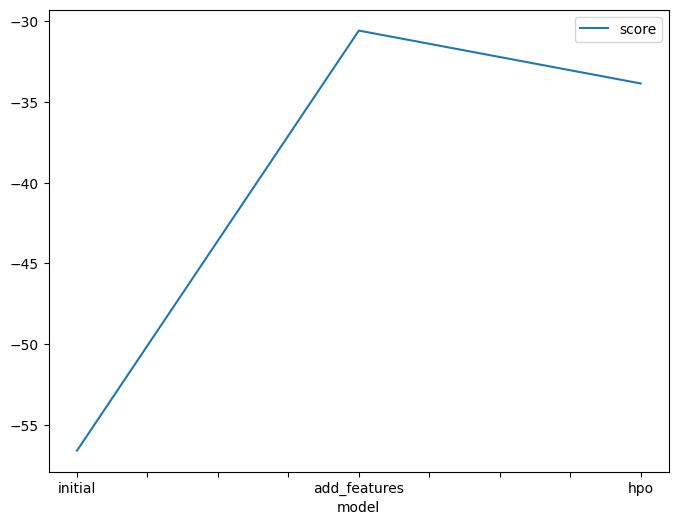

In [46]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
# For initial predictor
lb = predictor.leaderboard(silent=True)
best_model = lb.iloc[0]['model']
score_initial = lb.iloc[0]['score_val']

# For predictor with added features
lb_features = predictor_new_features.leaderboard(silent=True)
best_model_features = lb_features.iloc[0]['model']
score_add_features = lb_features.iloc[0]['score_val']

# For predictor with HPO
lb_hpo = predictor_new_hpo.leaderboard(silent=True)
best_model_hpo = lb_hpo.iloc[0]['model']
score_hpo = lb_hpo.iloc[0]['score_val']


fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [score_initial, score_add_features, score_hpo]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

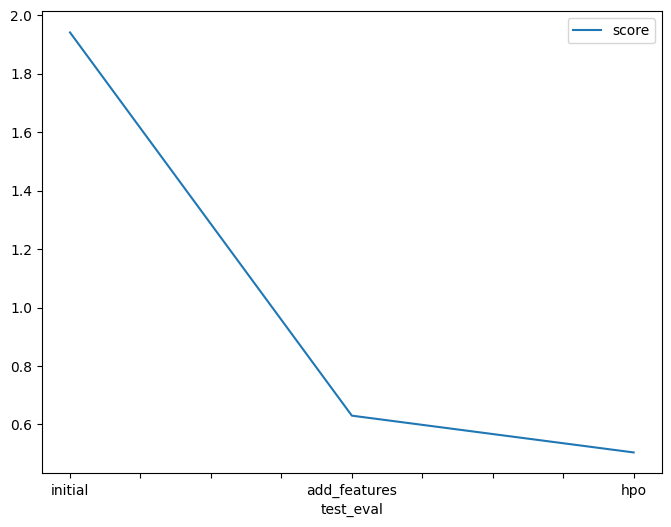

In [48]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.94080, 0.63021, 0.50441]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [49]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [None, None, 20],
    "hpo2": [None, None, "random"],
    "hpo3": [None, None, "default"],
    "score": [1.94080, 0.63021, 0.50441]
})

,model,hpo1,hpo2,hpo3,score
0,initial,NaN,None,None,1.94080
1,add_features,NaN,None,None,0.63021
2,hpo,20.0,random,default,0.50441


# Extra

In [50]:
# Define individual models with basic HPO settings
custom_hpo = {
    'RF': {},  # Random Forest
    'XGB': {'n_estimators': 300},
    'GBM': {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
    'NN_TORCH': {'num_epochs': 60},
    'KNN': {},
    'CAT': {}
}

# Set up tuned predictor
predictor_tuned = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train_cleaned,
    time_limit=1200,
    presets="high_quality",
    hyperparameters=custom_hpo,
    verbosity=2
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250521_153304"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.52 GB / 12.67 GB (83.0%)
Disk Space Avail:   66.10 GB / 107.72 GB (61.4%)
Presets specified: ['high_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is ena

In [55]:
predictor_tuned.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                         model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          WeightedEnsemble_L3  -93.597653  root_mean_squared_error      55.864948  703.386052                0.001641           0.058620            3      False         12
1              CatBoost_BAG_L2  -94.695042  root_mean_squared_error      53.284727  566.257025                0.072487          77.869251            2      False          9
2          RandomForest_BAG_L2  -94.804575  root_mean_squared_error      54.864897  537.783433                1.652657          49.395658            2      False          8
3               XGBoost_BAG_L2  -94.963999  root_mean_squared_error      53.398519  524.420434                0.186279          36.032659            2      False         10
4            LightGBMXT_BAG_L2  -95.018694  root_mean_squared_error      

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighbors_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'KNeighbors_BAG_L1_FULL': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1_FULL': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1_FULL': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1_FULL': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1_FULL': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2_FULL': 'WeightedEnsembleModel',
  '

In [56]:
# Get predictions from the predictor
prediction_tuned = predictor_tuned.predict(test)

In [57]:
# Remember to set all negative values to zero

# Set them to zero
prediction_tuned = prediction_tuned.clip(lower=0)
# Set all negative predictions to 0
prediction_tuned[prediction_tuned < 0] = 0


In [59]:
# Same submitting predictions
submission_tuned = submission_new_features.copy()
submission_tuned["count"] = prediction_tuned
submission_tuned.to_csv("submission_tuned.csv", index=False)

In [60]:
!kaggle competitions submit -c bike-sharing-demand -f submission_tuned.csv -m "new features with supeerb hyperparameters"

100% 188k/188k [00:00<00:00, 462kB/s]
Successfully submitted to Bike Sharing Demand

In [61]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                                status                     publicScore  privateScore  
---------------------------  --------------------------  -----------------------------------------  -------------------------  -----------  ------------  
submission_tuned.csv         2025-05-21 15:56:37.633000  new features with supeerb hyperparameters  SubmissionStatus.COMPLETE  1.87841      1.87841       
submission_new_hpo.csv       2025-05-21 15:26:29.193000  new features with hyperparameters          SubmissionStatus.COMPLETE  0.50470      0.50470       
submission_new_features.csv  2025-05-21 15:21:45.863000  new features                               SubmissionStatus.COMPLETE  0.65867      0.65867       
submission.csv               2025-05-21 15:08:16.603000  first raw submission                       SubmissionStatus.COMPLETE  1.76767      1.76767       


In [62]:
# Compare models after tuning
leaderboard_tuned = predictor_tuned.leaderboard(silent=True)
leaderboard_tuned[['model', 'score_val', 'fit_time']]

,model,score_val,fit_time
0,WeightedEnsemble_L3,-93.597653,703.386052
1,CatBoost_BAG_L2,-94.695042,566.257025
2,RandomForest_BAG_L2,-94.804575,537.783433
3,XGBoost_BAG_L2,-94.963999,524.420434
4,LightGBMXT_BAG_L2,-95.018694,540.029864
5,WeightedEnsemble_L2,-100.449817,22.693089
6,KNeighbors_BAG_L1,-101.546199,0.040525
7,NeuralNetTorch_BAG_L2,-103.522763,571.830807
8,RandomForest_BAG_L1,-116.548359,22.616265
9,CatBoost_BAG_L1,-130.625259,319.447832


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


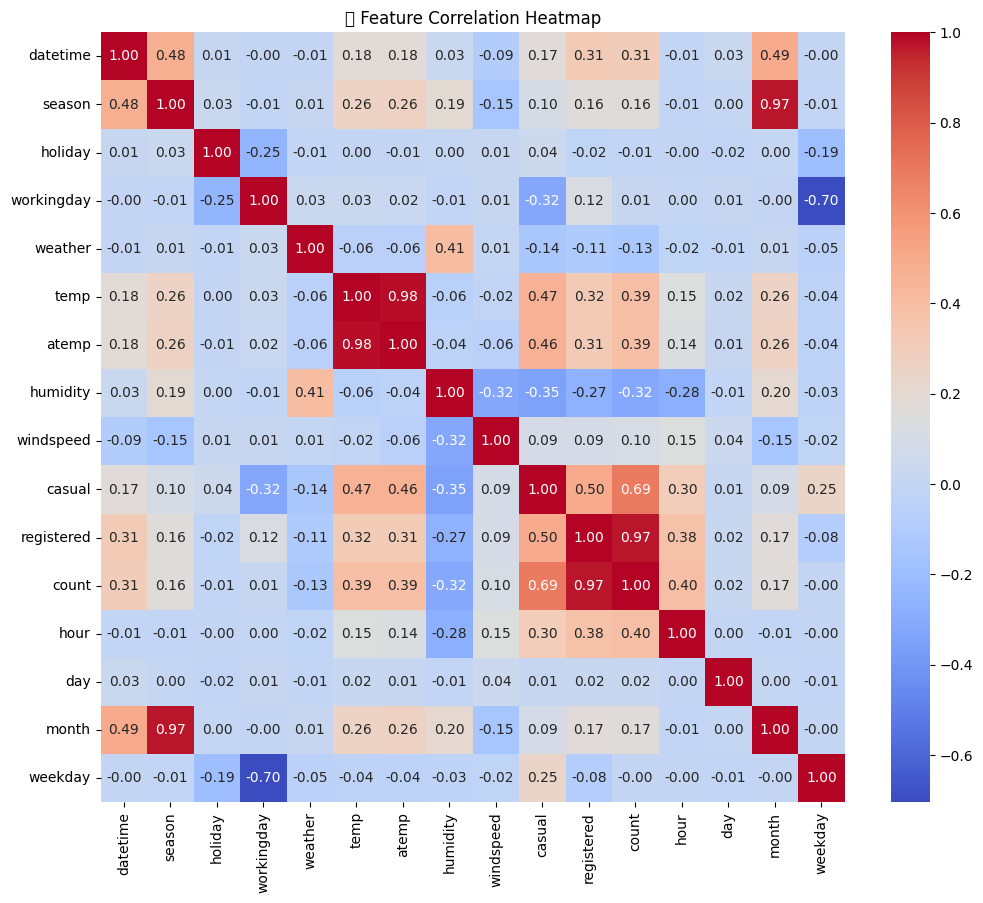

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


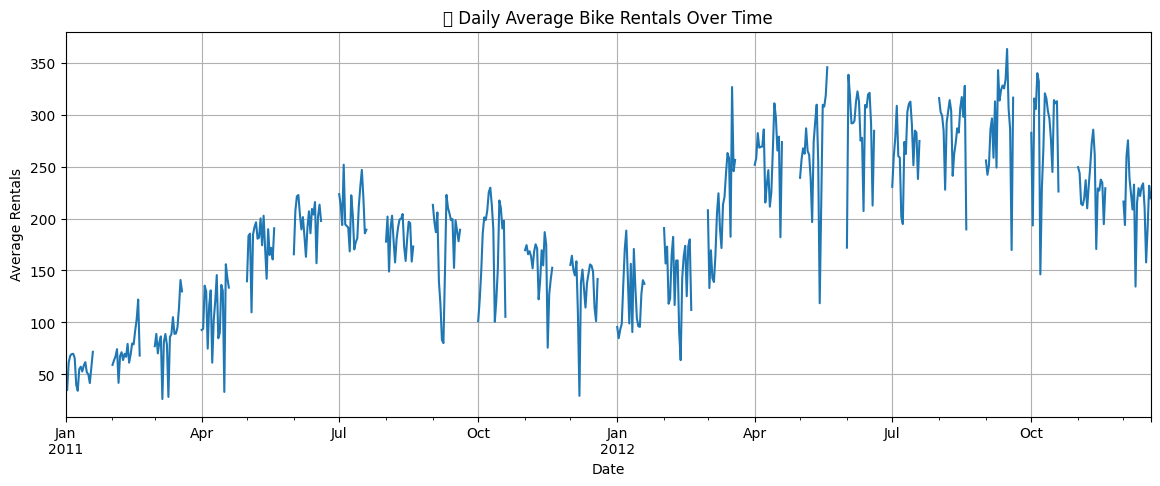

In [53]:
# Reload with datetime to preserve original time info
train_ts = pd.read_csv("train.csv", parse_dates=["datetime"])
train_ts.set_index("datetime", inplace=True)

plt.figure(figsize=(14, 5))
train_ts["count"].resample("D").mean().plot()
plt.title("📈 Daily Average Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rentals")
plt.grid(True)
plt.show()

<ipython-input-54-7e568b2c6740>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=leaderboard_tuned, x="score_val", y="model", palette="Blues_r")
<ipython-input-54-7e568b2c6740>:5: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


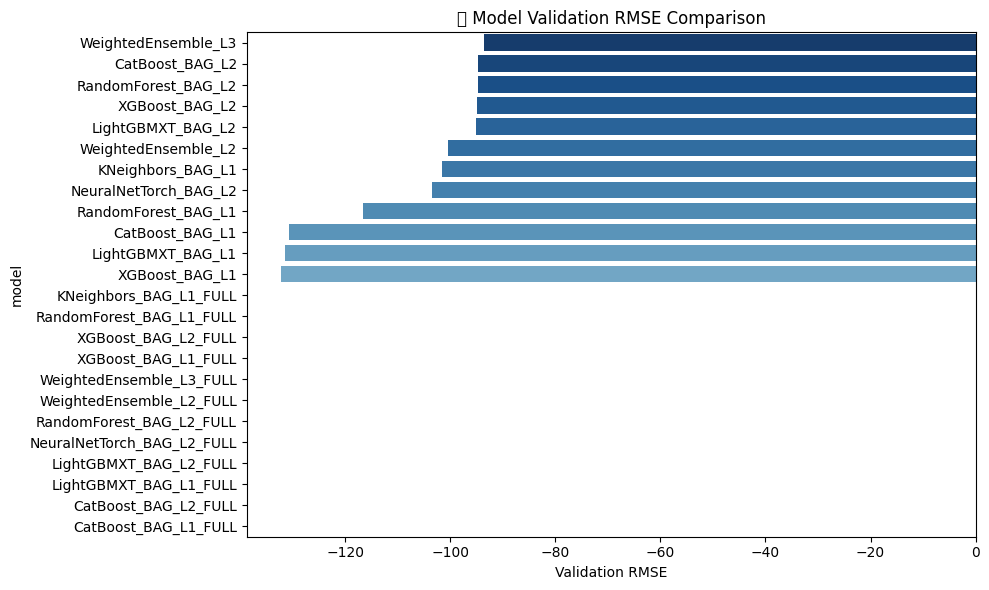

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=leaderboard_tuned, x="score_val", y="model", palette="Blues_r")
plt.xlabel("Validation RMSE")
plt.title("📊 Model Validation RMSE Comparison")
plt.tight_layout()
plt.show()